## This code is to find out the different of each epoch and batch size combination

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [2]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path = parent_path / 'Data/googlenet/cifar100/'
print('The data path is:', data_path)

The current path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/code
The parent path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet/cifar100


### extract data

In [3]:
batch_sizes = [256]
epochs = [20]
rounds = 1

#### read all the data from all the folders

In [4]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder_names = os.listdir(data_path)
print('The folder names are:', folder_names)
print('The folder list is:', folder_list)

# find the common folders
common_folders = list(set(folder_list).intersection(folder_names))
# sort the common folders
common_folders.sort()
print('The common folders are:', common_folders)
print(len(common_folders))

The folder names are: ['E20_B256_R0']
The folder list is: ['E20_B256_R0']
The common folders are: ['E20_B256_R0']
1


### analysis data

#### find the data in same epoch and batch size

In [5]:
# read the data from the common folders
datafolder = data_path / common_folders[0]
print('The data folder is:', datafolder)
# find the files in the data folder
files = os.listdir(datafolder)
print('The files are:', files)


The data folder is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet/cifar100/E20_B256_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']


In [6]:
# read all the files in the common folders
LayersTime = np.load(datafolder / 'Layers_time.npy', allow_pickle=True)
TrainPartTime = np.load(datafolder / 'Train_part_time.npy', allow_pickle=True)
EpochTime = np.load(datafolder / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy = np.load(datafolder / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc = np.load(datafolder / 'Train_acc.npy', allow_pickle=True)
TestAcc = np.load(datafolder / 'Test_acc.npy', allow_pickle=True)

In [7]:
# print('The layers time is:', LayersTime)
# print('The train part time is:', TrainPartTime)
# print('The epoch time is:', EpochTime)
# print('The epoch energy is:', EpochEnergy)
# print('The train accuracy is:', TrainAcc)
# print('The test accuracy is:', TestAcc)

#### LayersTime

In [8]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_I0', 'S2_I1', 'S2_M2', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S3_M5', 'S4_I0', 'S4_I1', 'S4_A2', 'S4_F3']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 21


In [9]:
# print('The shape of LayersTime is:', LayersTime.shape)
# print(LayersTime)

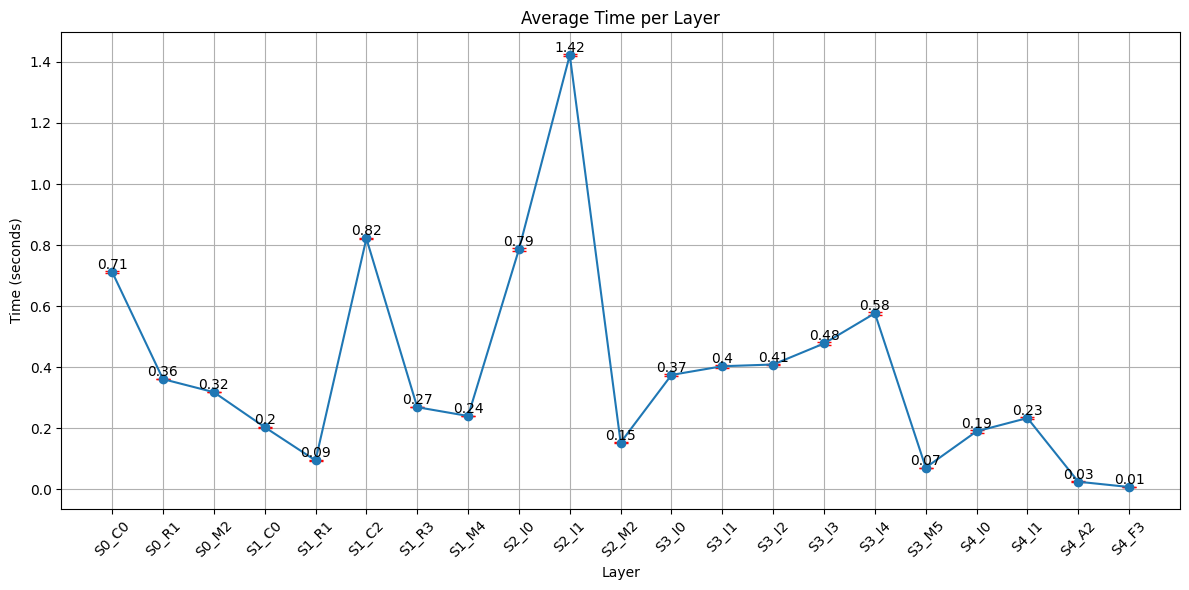

In [10]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime, axis=1)
layer_stds = np.std(LayersTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()


In [11]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [12]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[0.80449891 0.78401732 0.78456664 0.78850508 0.78574491 0.78486276
  0.78382087 0.7849474  0.78396654 0.78448439 0.78461599 0.78566909
  0.78403783 0.78326082 0.78437734 0.785532   0.78406549 0.78625751
  0.78587222 0.78565979]
 [1.43692708 1.42069483 1.42158079 1.42409706 1.42243361 1.42174459
  1.42069006 1.42157269 1.42135406 1.4214685  1.42161727 1.42244625
  1.42112064 1.42013335 1.4210546  1.42173862 1.42113733 1.42253399
  1.42202258 1.421731  ]
 [0.39418006 0.37250352 0.37309694 0.37690663 0.3742888  0.37395191
  0.37259865 0.37473965 0.37303996 0.37284541 0.37317181 0.37430692
  0.37270713 0.37187696 0.37427688 0.37403202 0.37281942 0.37527657
  0.37452459 0.37438321]
 [0.42262626 0.40121007 0.40194654 0.40409207 0.40278912 0.40265775
  0.4014895  0.40232134 0.4016552  0.40148377 0.40183854 0.40284038
  0.40177536 0.40098333 0.40230632 0.40233827 0.40155697 0.40360594
  0.40288758 0.40247035]
 [0.41533709 0.40944147 0.40824318 0.41049147 0.40888071 0.409

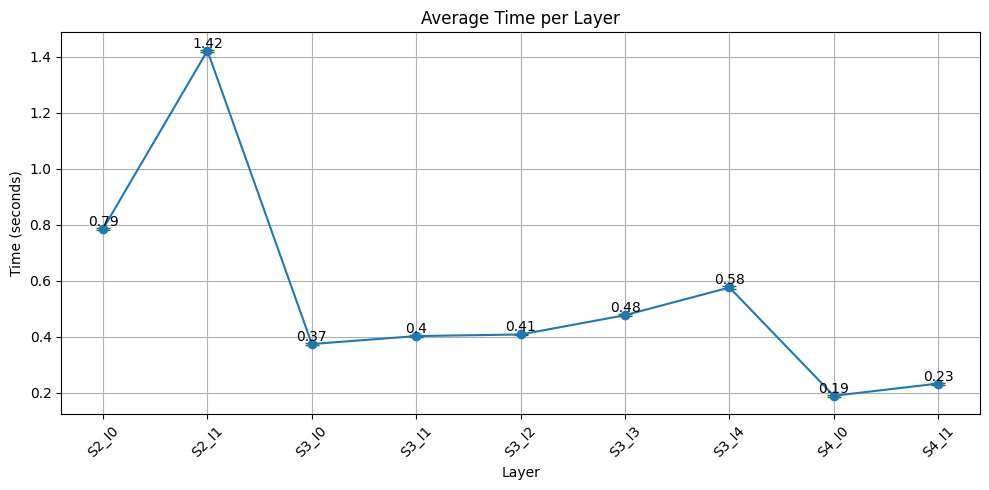

In [13]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [14]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

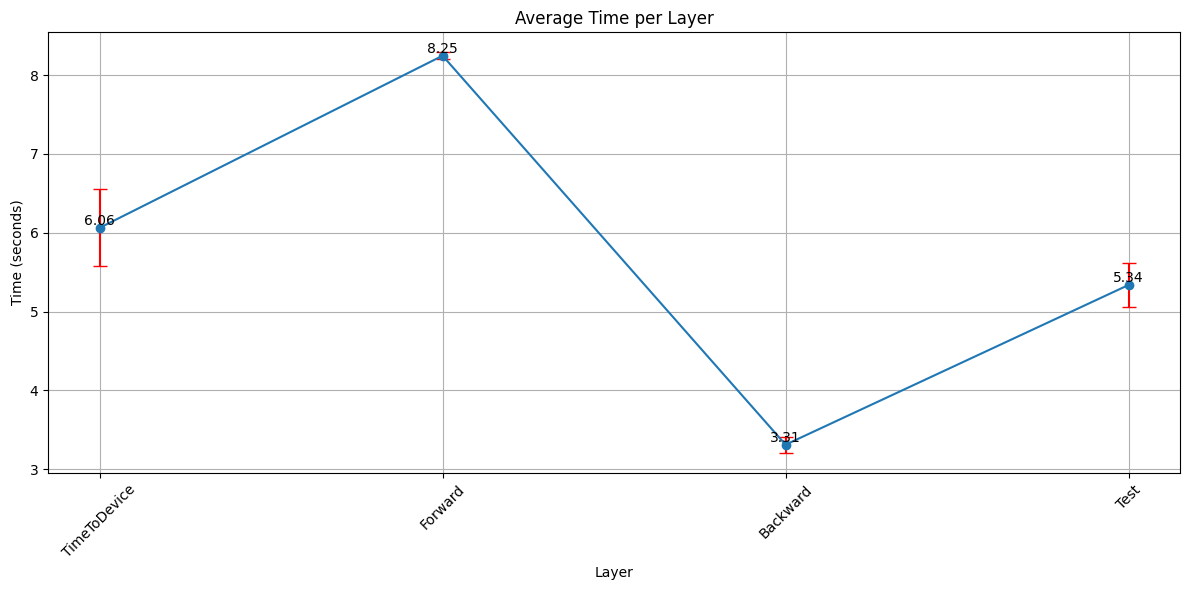

In [15]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime, axis=1)
trainpart_stds = np.std(TrainPartTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()